In [1]:
import sys, os, time
import shutil
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 215 runs


In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [34]:
M.clear_filters().filter_strs('!test')

# M.filter_since(date='200114').filter_data('rgbball')
# M.filter_jobs(157, 158)
M.filter_jobs(169)
# M.filter_jobs(138)
# M.filter_jobs(172)
# M.filter_models('vae')
# M.filter_jobs(94, 122) # basic models
# M.filter_jobs(100, 102)
# M.filter(lambda r: 'adain-dec' in r.config.info.history)
# M.filter_models('wae')

# M.filter_checkpoints(60)

# M.load_configs(60)

M.load_configs()

M.show()

Selecting checkpoint: last
  0 - 3dshapes-fwae_0169-6001656-00_200122-122737
  1 - 3dshapes-fwae_0169-6001656-01_200122-122732
  2 - 3dshapes-fwae_0169-6001656-02_200122-122734
  3 - 3dshapes-fwae_0169-6001656-03_200122-122732
  4 - 3dshapes-fwae_0169-6001656-04_200122-122734
  5 - 3dshapes-fwae_0169-6001656-05_200122-122735
  6 - 3dshapes-fwae_0169-6001656-06_200122-122732
  7 - 3dshapes-fwae_0169-6001656-07_200122-122732


In [35]:
M.show_unique()

  0) 3dshapes-fwae_0169-6001656-00_200122-122737
	training.epochs - 60 (100)
	model.latent_reg_wt - 500 (100)
	model.reg_prior - 0.05 (0.5)

  1) 3dshapes-fwae_0169-6001656-01_200122-122732
	training.epochs - 60 (100)
	model.latent_reg_wt - 500 (100)
	model.reg_prior - 0.01 (0.5)

  2) 3dshapes-fwae_0169-6001656-02_200122-122734
	training.epochs - 60 (100)
	model.latent_reg_wt - 1000.0 (100)
	model.reg_prior - 0.01 (0.5)

  3) 3dshapes-fwae_0169-6001656-03_200122-122732
	training.epochs - 60 (100)
	model.latent_reg_wt - 10000.0 (100)
	model.reg_prior - 0.01 (0.5)

  4) 3dshapes-fwae_0169-6001656-04_200122-122734
	training.epochs - 60 (100)
	model.latent_dim - 8 (16)
	model.latent_reg_wt - 500 (100)
	model.reg_prior - 0.05 (0.5)

  5) 3dshapes-fwae_0169-6001656-05_200122-122735
	training.epochs - 60 (100)
	model.latent_dim - 8 (16)
	model.latent_reg_wt - 500 (100)
	model.reg_prior - 0.01 (0.5)

  6) 3dshapes-fwae_0169-6001656-06_200122-122732
	training.epochs - 60 (100)
	model.latent_di

In [36]:
M.clear_run_cache()

In [23]:
run = M[1]
run.name

'3dshapes-vae_0138-5986313-02_200116-114440'

In [24]:
run.reset()

run.load(pbar=tqdm)
run.run(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-vae_0138-5986313-02_200116-114440/checkpoint_100.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-vae_0138-5986313-02_200116-114440/checkpoint_100.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
name: 3dshapes
Not enough memory to move dataset to cuda
Dataset din=(3, 64, 64), dout=(3, 64, 64)
Model-type: vpp
encoder (type=double-enc): 
  latent_dim: 16
  min_log_std: None (by default)
  in_shape --> din: (3, 64, 64) (by parent)
  channels: [64, 64, 64, 128, 128] (by parent)
  factors: 2 (by parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 32
  tail (type=nn): 
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 32
    hidden_dims: [256, 128]
    nonlin: elu (by parent)
    output_nonlin: None (by default)
  nonlin: elu (by parent)
  output_nonlin: N


torch.Size([38400, 2, 16])


In [25]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

torch.Size([38400, 16])



(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


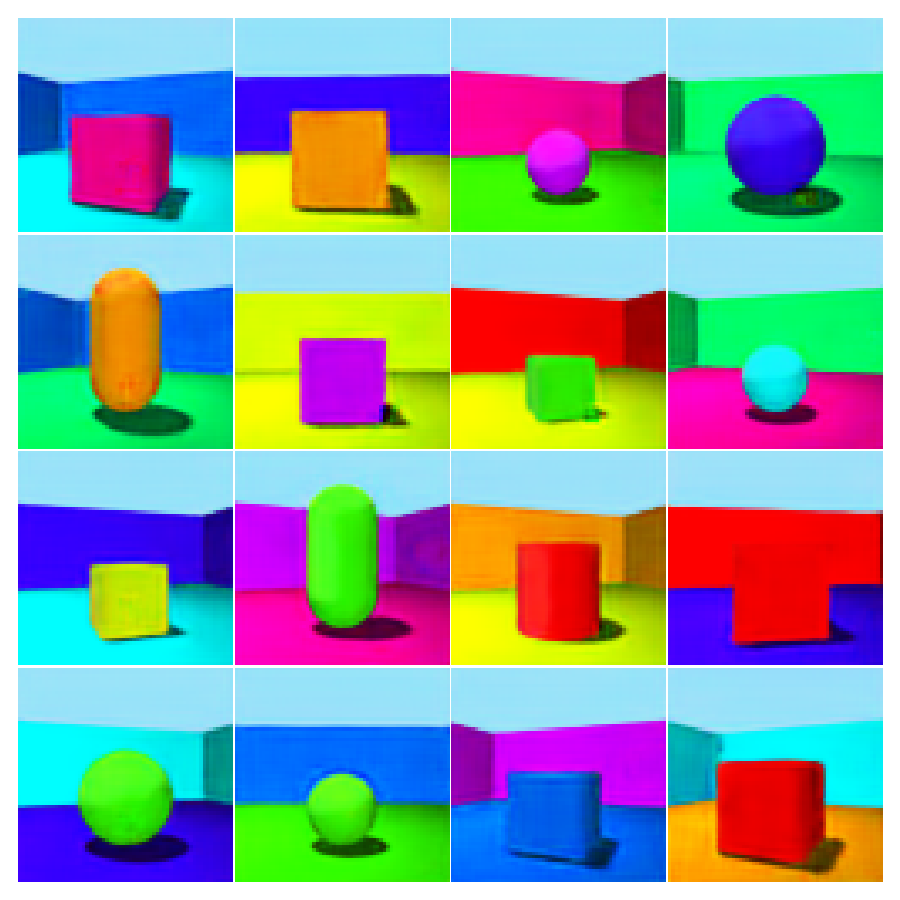

In [26]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


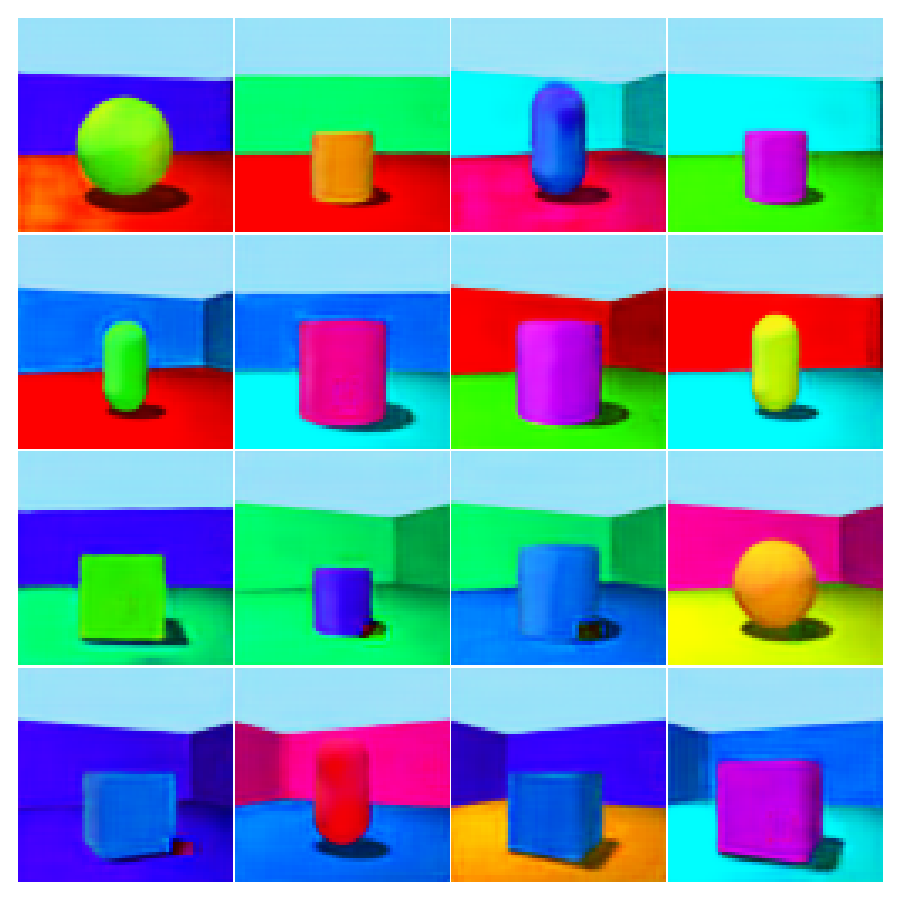

In [27]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


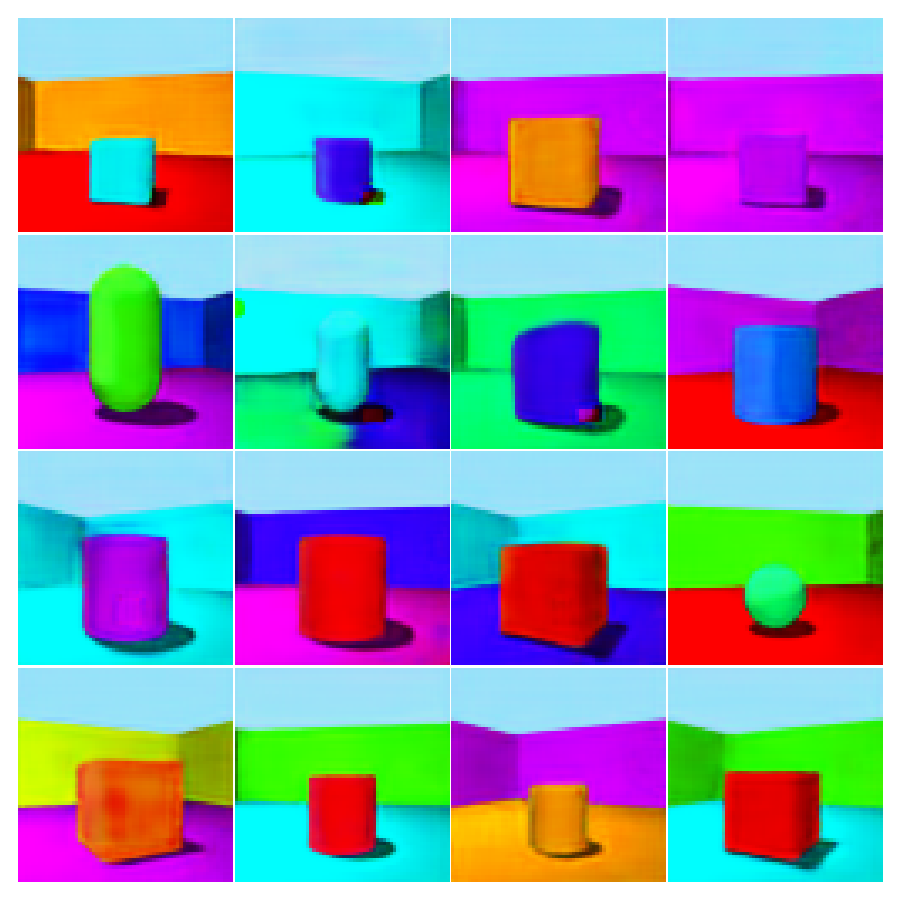

In [28]:
viz['gens'][0].view(scale=2)

In [29]:
viz['traversals'][1].view(scale=2)

<IPython.core.display.Javascript object>


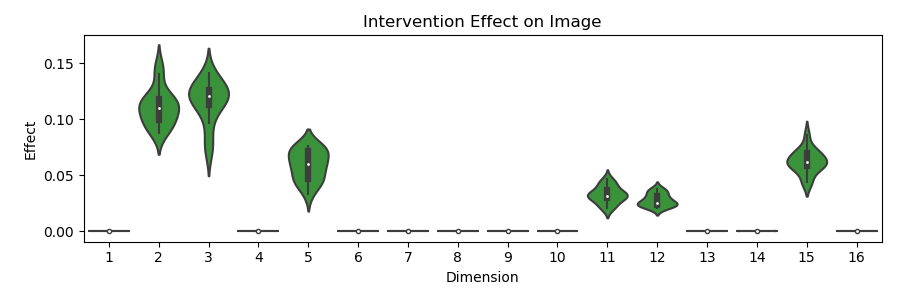

In [30]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


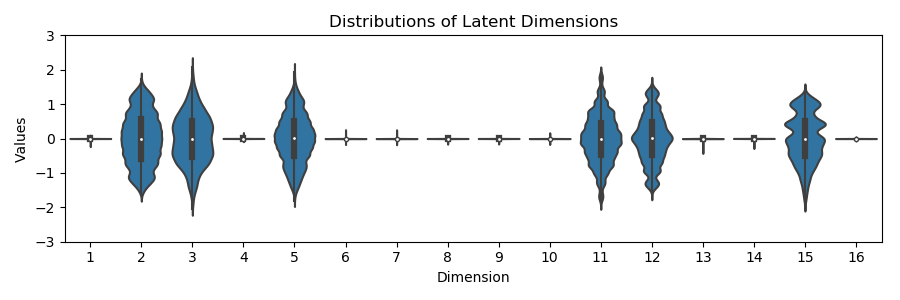

In [31]:
fig = viz['latent'][0].view(scale=2)
# plt.figure(fig.number)
# ax = fig.get_axes()[0]
# ax.set_ylim(-3, 3)
fig

In [32]:
run.evaluate(pbar=tqdm)

Took 0.04 s



{'IRS': {'IRS': 0.6899378238049236, 'num_active_dims': -4.4680824}}

In [18]:
# media_root = '/is/ei/fleeb/workspace/media/hybrid/new/3dshapes/vaes'
# run.save('test_model/')